# Demo for prox_elasticnet package

Below we import `prox_elasticnet` along with some other useful packages.

In [1]:
from prox_elasticnet import ElasticNet, ElasticNetCV
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
np.random.seed(319159)

## Diabetes dataset

Import the `diabetes` dataset which is included in sklearn.

It consists of 10 physiological variables (age, sex, weight, blood pressure) measured on 442 patients, and an indication of disease progression after one year.

In [2]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

Our goal is to fit a linear model using Elastic Net regularisation, which predicts the disease progression for a given patient's physiological variables.

We separate the data into training and test sets (80% train/20% test)

In [3]:
prop_train = 0.8
n_pts = len(y)
n_train = np.floor(n_pts * prop_train).astype(int)
n_test = n_pts - n_train
ix = np.arange(n_pts)
np.random.shuffle(ix)
train_ix = ix[0:n_train]
test_ix = ix[n_train:n_pts]
X_train = X[train_ix,:]
y_train = y[train_ix]
X_test = X[test_ix,:]
y_test = y[test_ix]

First we run the basic ElasticNet model with the default parameters.

In [4]:
model = ElasticNet().fit(X_train, y_train)
y_pred = model.predict(X_test)
print("The coefficient of determination for this model is: {}".format(model.score(X_test,y_test)))

The coefficient of determination for this model is: 0.006725801927946362


The model coefficients are accessed as follows:

In [5]:
model.coef_

array([ 0.37272729,  0.        ,  3.23379365,  1.96187913,  0.60426395,
        0.37083423, -1.96050644,  2.23367772,  3.16153716,  1.76945084])

The package also provides ElasticNetCV which chooses the regularisation parameters (`alpha` and `l1_ratio`) which yield the best mean-squared error.

In [6]:
model_cv = ElasticNetCV(l1_ratio = np.arange(0.1,0.9,step=0.1)).fit(X_train, y_train)
y_pred_cv = model_cv.predict(X_test)
print("The coefficient of determination for this model is: {}".format(model_cv.score(X_test,y_test)))

The coefficient of determination for this model is: 0.4879796830390967


We can see that there been a significant increase in the coefficient of determination ($R^2$) on the test set when compared to the previous model (although it is still rather poor). The `alpha` and `l1_ratio` values that have been selected through cross-validation are accessed as follows:

In [9]:
model_cv.alpha_

0.0026695774478037084

In [10]:
model_cv.l1_ratio_

0.80000000000000004

The mean-squared error is in fact available for all combinations of `alpha`, `l1_ratio` and each fold of cross-validation. As an example, we plot the mean-squared error for the optimal `l1_ratio = 0.8` as a function of `alpha`. We average over the three folds of cross validation.

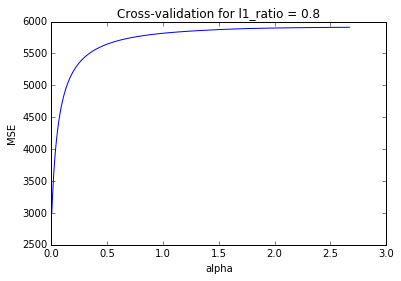

In [11]:
plt.title("Cross-validation for l1_ratio = 0.8")
plt.plot(model_cv.alphas_[7],model_cv.mse_path_.mean(axis=2)[7])
plt.xlabel("alpha")
plt.ylabel("MSE")
plt.show()